Best match location: (152, 137)
Match score: 1.5047403573989868


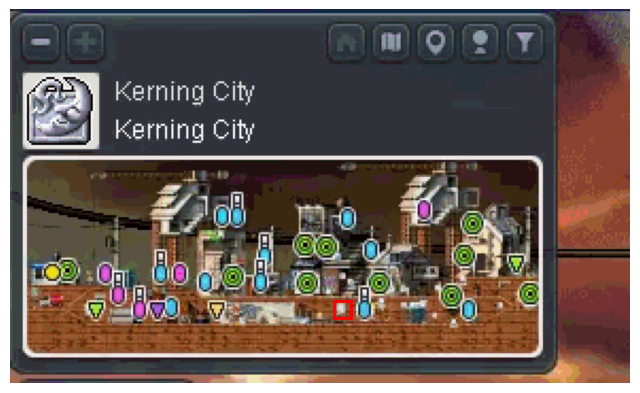

hi hello


In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def main():
    # img = cv.imread('pictures/images/kerning_city.png', cv.IMREAD_GRAYSCALE)
    # assert img is not None, "file could not be read, check with os.path.exists()"
    # img2 = img.copy()
    # template = cv.imread('pictures/templates/icons/player.png', cv.IMREAD_GRAYSCALE)
    # assert template is not None, "file could not be read, check with os.path.exists()"
    # w, h = template.shape[::-1]
    # # All the 6 methods for comparison in a list
    # methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
    #             'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    # for meth in methods:
    #     img = img2.copy()
    #     method = eval(meth)
    #     # Apply template Matching
    #     res = cv.matchTemplate(img,template,method)
    #     min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    #     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    #     if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    #         top_left = min_loc
    #     else:
    #         top_left = max_loc
    #     bottom_right = (top_left[0] + w, top_left[1] + h)
    #     cv.rectangle(img,top_left, bottom_right, 255, 2)
    #     plt.subplot(121),plt.imshow(res,cmap = 'gray')
    #     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    #     plt.subplot(122),plt.imshow(img,cmap = 'gray')
    #     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    #     plt.suptitle(meth)
    #     plt.show()

    imageMainBGR = cv.imread("pictures/images/kerning_city.png")
    imageNeedleBGR = cv.imread("pictures/templates/icons/player.png")

    assert imageMainBGR is not None
    assert imageNeedleBGR is not None

    # Split BGR channels
    mainB, mainG, mainR = cv.split(imageMainBGR)
    needleB, needleG, needleR = cv.split(imageNeedleBGR)

    # Template matching (normalized so values are meaningful)
    resB = cv.matchTemplate(mainB, needleB, cv.TM_SQDIFF_NORMED)
    resG = cv.matchTemplate(mainG, needleG, cv.TM_SQDIFF_NORMED)
    resR = cv.matchTemplate(mainR, needleR, cv.TM_SQDIFF_NORMED)

    # Combine channels
    result = resB + resG + resR

    # ✅ ONE BEST MATCH
    min_val, _, min_loc, _ = cv.minMaxLoc(result)
    top_left = min_loc  # (x, y)

    print("Best match location:", top_left)
    print("Match score:", min_val)

    # Draw result
    h, w = imageNeedleBGR.shape[:2]
    imageMainRGB = cv.cvtColor(imageMainBGR, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(imageMainRGB)

    rect = plt.Rectangle(
        top_left,
        w,
        h,
        edgecolor='red',
        facecolor='none',
        linewidth=2
    )
    plt.gca().add_patch(rect)

    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    main()
    print('hi hello')



In [ ]:
1+1

2